In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import export_graphviz
import graphviz
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# Set visualization style
%matplotlib inline
sns.set_style('whitegrid')

In [3]:
# Load the dataset
df = pd.read_csv('heart.csv')

# Display basic information
print('Dataset Info:')
print(df.info())
print('\nMissing Values:')
print(df.isnull().sum())

# Standardize numerical features
scaler = StandardScaler()
feature_cols = df.columns.drop('target')
df[feature_cols] = scaler.fit_transform(df[feature_cols])

# Save cleaned dataset
df.to_csv('Heart_Disease_Cleaned.csv', index=False)
print('\nCleaned Dataset Info:')
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        

Summary Statistics:
                age           sex            cp      trestbps          chol  \
count  1.025000e+03  1.025000e+03  1.025000e+03  1.025000e+03  1.025000e+03   
mean  -3.431402e-16  1.802352e-16  5.545699e-17 -7.036106e-16 -3.466062e-18   
std    1.000488e+00  1.000488e+00  1.000488e+00  1.000488e+00  1.000488e+00   
min   -2.804866e+00 -1.511706e+00 -9.157554e-01 -2.148237e+00 -2.327054e+00   
25%   -7.095548e-01 -1.511706e+00 -9.157554e-01 -6.632165e-01 -6.787242e-01   
50%    1.726817e-01  6.615041e-01  5.593123e-02 -9.205458e-02 -1.163527e-01   
75%    7.240794e-01  6.615041e-01  1.027618e+00  4.791073e-01  5.623715e-01   
max    2.488552e+00  6.615041e-01  1.999305e+00  3.906079e+00  6.166694e+00   

                fbs       restecg       thalach         exang       oldpeak  \
count  1.025000e+03  1.025000e+03  1.025000e+03  1.025000e+03  1.025000e+03   
mean  -4.159275e-17 -8.318549e-17 -4.332578e-16 -7.625337e-17 -2.426243e-16   
std    1.000488e+00  1.000488e+

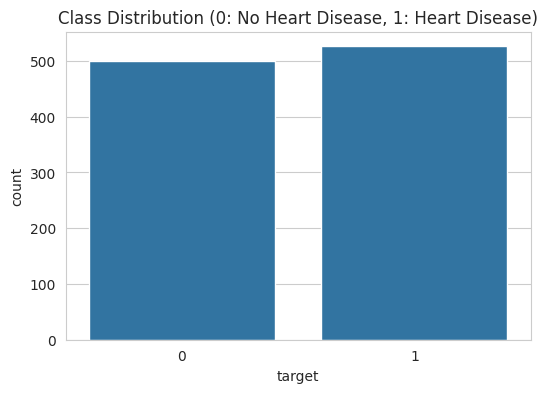

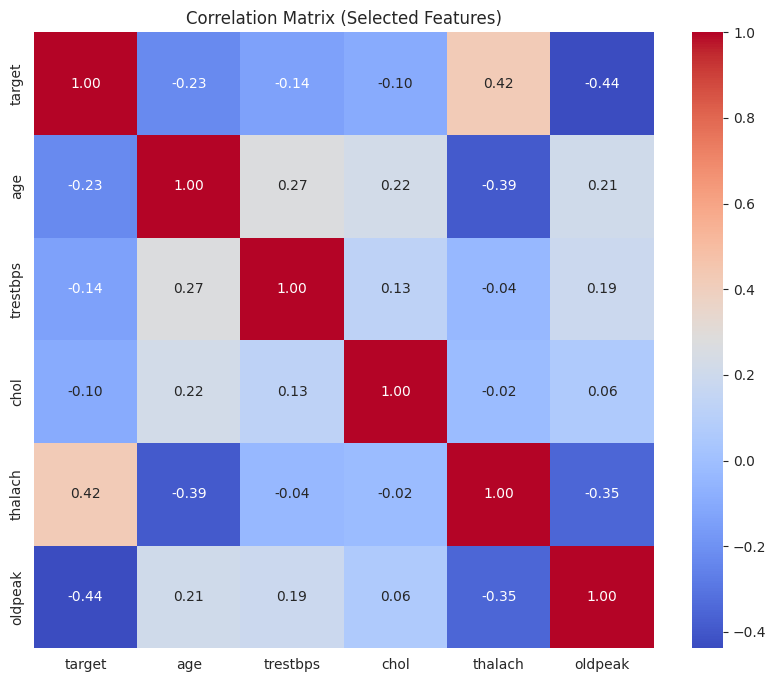

In [4]:
# Summary statistics
print('Summary Statistics:')
print(df.describe())

# Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Class Distribution (0: No Heart Disease, 1: Heart Disease)')
plt.savefig('class_distribution.png')
plt.show()

# Correlation matrix (select subset of features for visualization)
plt.figure(figsize=(10, 8))
corr_matrix = df[['target', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Selected Features)')
plt.savefig('correlation_matrix.png')
plt.show()

Decision Tree Accuracy: 0.9854


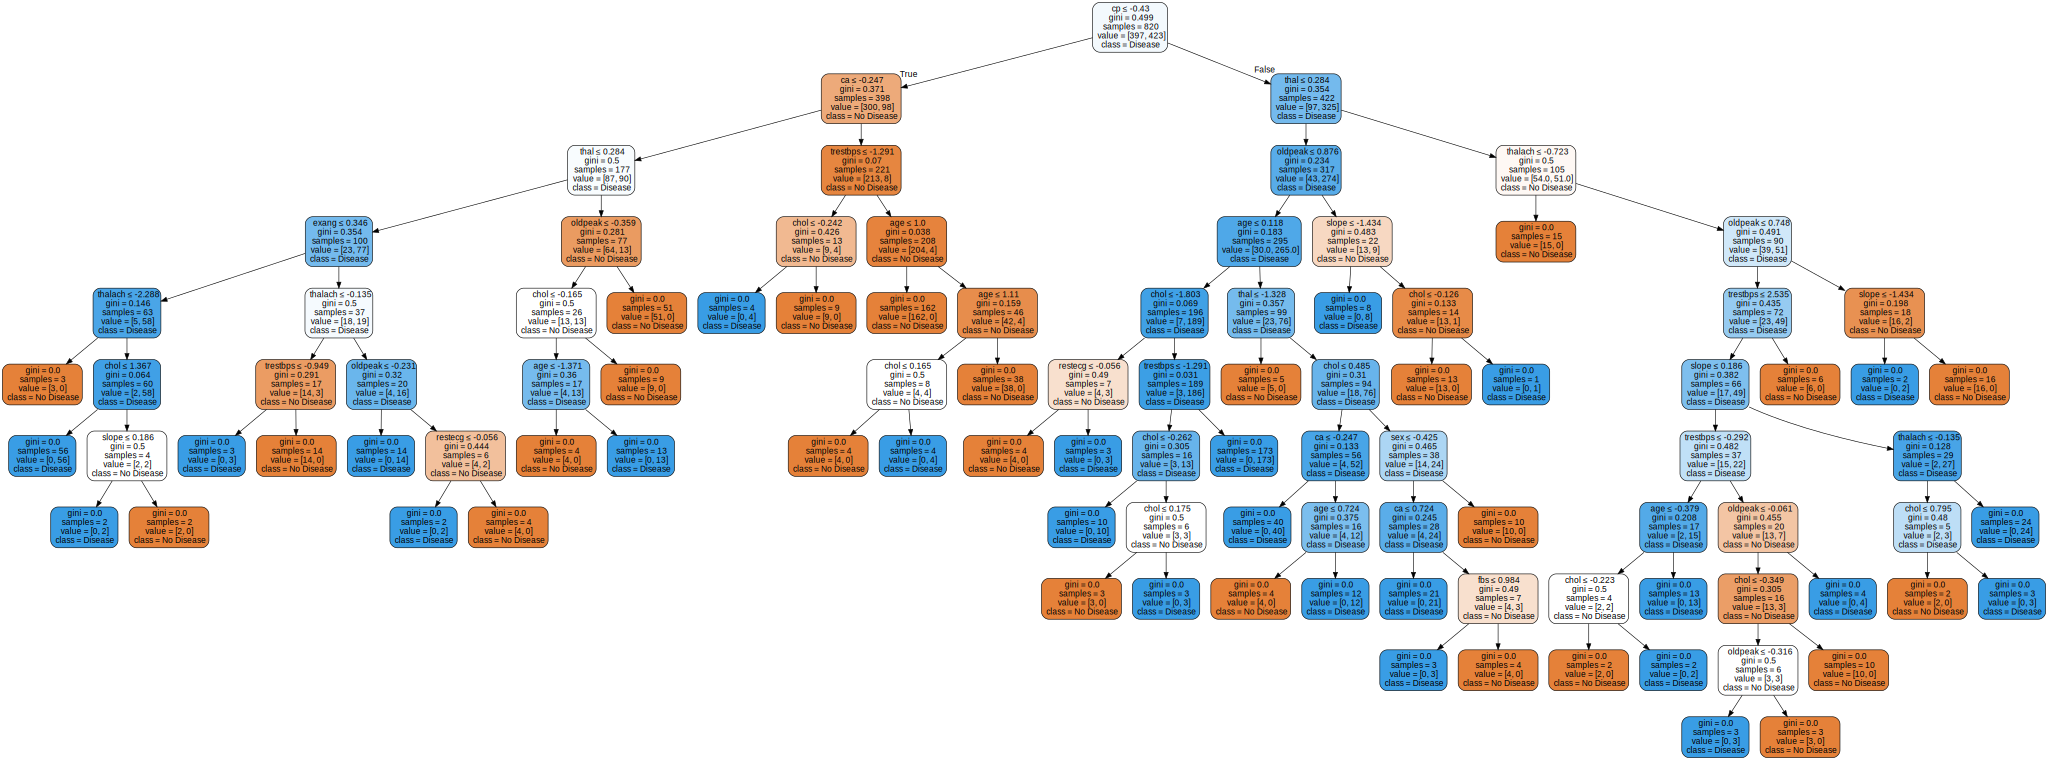

In [5]:
# Prepare data
X = df.drop('target', axis=1)
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree with default parameters
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions and accuracy
y_pred_dt = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {dt_accuracy:.4f}')

# Visualize decision tree
dot_data = export_graphviz(dt, out_file=None, feature_names=X.columns, class_names=['No Disease', 'Disease'],
                           filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('decision_tree', format='png', cleanup=True)
graph

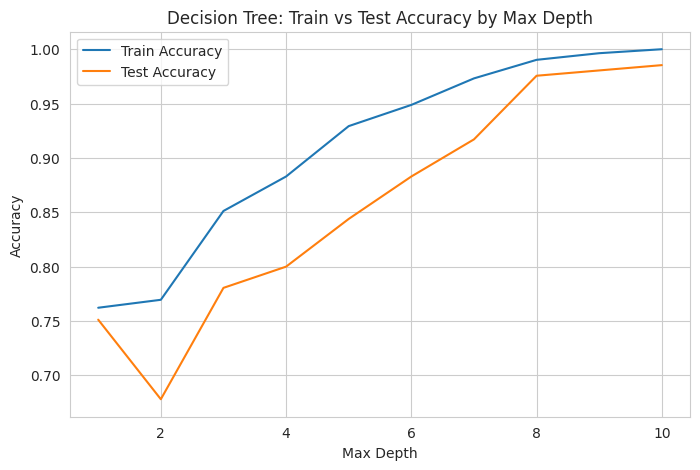

Optimized Decision Tree Accuracy (max_depth=3): 0.7805


In [6]:
# Analyze overfitting by varying max_depth
depths = range(1, 11)
train_accuracies = []
test_accuracies = []

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    train_accuracies.append(accuracy_score(y_train, dt.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, dt.predict(X_test)))

# Plot train vs test accuracy
plt.figure(figsize=(8, 5))
plt.plot(depths, train_accuracies, label='Train Accuracy')
plt.plot(depths, test_accuracies, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree: Train vs Test Accuracy by Max Depth')
plt.legend()
plt.savefig('depth_tuning.png')
plt.show()

# Train decision tree with optimal depth (e.g., 3)
dt_optimal = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_optimal.fit(X_train, y_train)
y_pred_dt_optimal = dt_optimal.predict(X_test)
dt_optimal_accuracy = accuracy_score(y_test, y_pred_dt_optimal)
print(f'Optimized Decision Tree Accuracy (max_depth=3): {dt_optimal_accuracy:.4f}')

In [7]:
# Train random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions and accuracy
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {rf_accuracy:.4f}')

# Compare accuracies
print('\nModel Comparison:')
print(f'Decision Tree (Default) Accuracy: {dt_accuracy:.4f}')
print(f'Decision Tree (Optimized) Accuracy: {dt_optimal_accuracy:.4f}')
print(f'Random Forest Accuracy: {rf_accuracy:.4f}')

# Classification report for random forest
print('\nRandom Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9854

Model Comparison:
Decision Tree (Default) Accuracy: 0.9854
Decision Tree (Optimized) Accuracy: 0.7805
Random Forest Accuracy: 0.9854

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



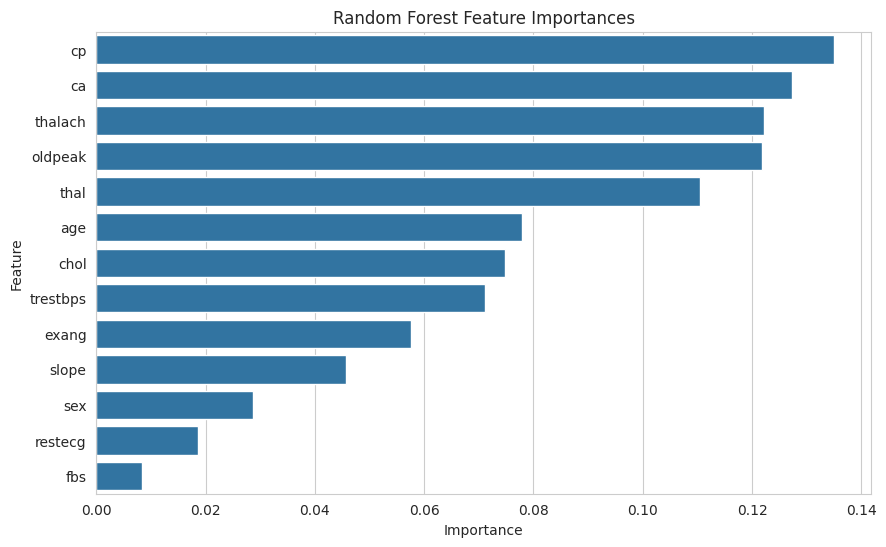

In [8]:
# Feature importances from random forest
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Random Forest Feature Importances')
plt.savefig('feature_importances.png')
plt.show()

In [9]:
# Cross-validation for decision tree (optimized) and random forest
dt_cv_scores = cross_val_score(dt_optimal, X, y, cv=5, scoring='accuracy')
rf_cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')

print('Cross-Validation Scores:')
print(f'Decision Tree (max_depth=3) CV Accuracy: {dt_cv_scores.mean():.4f} (+/- {dt_cv_scores.std() * 2:.4f})')
print(f'Random Forest CV Accuracy: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std() * 2:.4f})')

Cross-Validation Scores:
Decision Tree (max_depth=3) CV Accuracy: 0.8302 (+/- 0.0416)
Random Forest CV Accuracy: 0.9971 (+/- 0.0117)
